In [22]:
import os
import pandas as pd
import numpy as np
import gc
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
def load_data():
    df = pd.read_csv('music_genre.csv')
    return df

In [24]:
df = load_data()

In [25]:
df.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


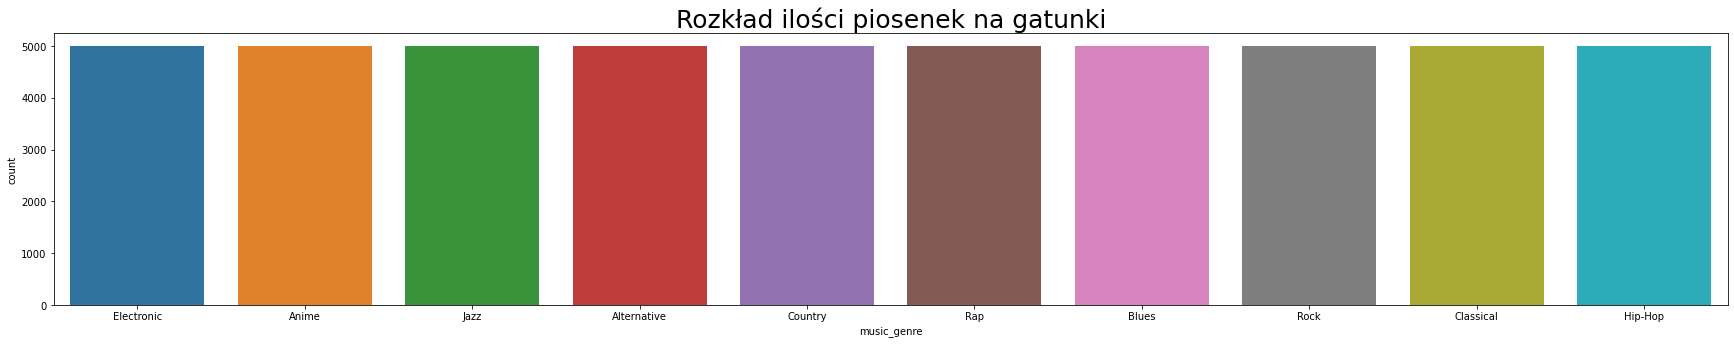

In [26]:
plt.figure(figsize=(30,5))
ax = sns.countplot(x="music_genre", data=df)
ax.set_title('Rozkład ilości piosenek na gatunki', fontsize=25)
plt.show()

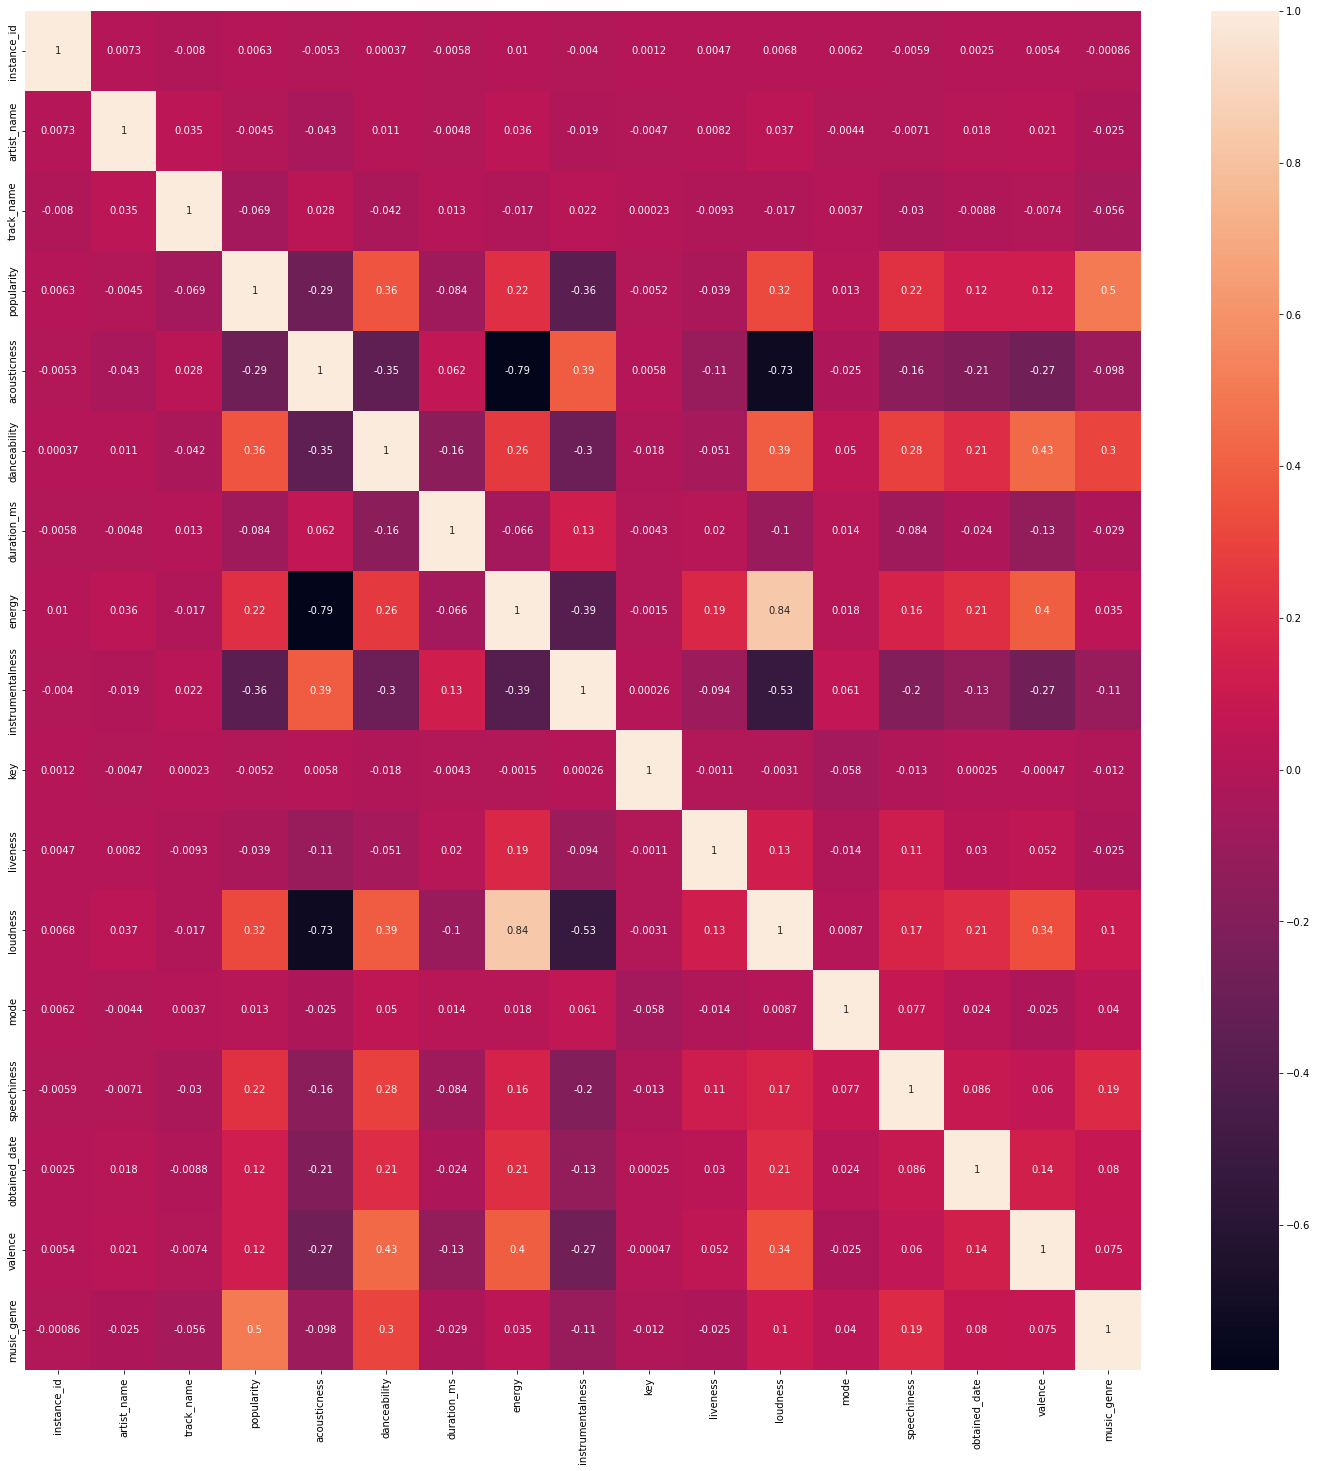

In [27]:
df2 = df.copy()
from sklearn.preprocessing import OrdinalEncoder 

ordinal_encoder = OrdinalEncoder()


df2[['artist_name','track_name', 'key',
         'mode',
         'obtained_date',
         'music_genre']] = ordinal_encoder.fit_transform(df2[['artist_name','track_name', 'key',
         'mode',
         'obtained_date',
         'music_genre']])

corrmat = df2.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(25,25))
g= sns.heatmap(df2[top_corr_features].corr(),annot=True)

In [28]:
df = df.drop(['instance_id', 'artist_name', 'track_name', 'obtained_date','key','mode'], axis = 1)

In [29]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder() 
#df['mode'] = le.fit_transform(df['mode'])
#df['key'] = le.fit_transform(df['key'])
df['music_genre'] = le.fit_transform(df['music_genre'])

In [30]:
df.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,music_genre
0,27.0,0.00468,0.652,-1.0,0.941,0.79200,0.115,-5.201,0.0748,100.889,0.759,5
1,31.0,0.01270,0.622,218293.0,0.890,0.95000,0.124,-7.043,0.0300,115.00200000000001,0.531,5
2,28.0,0.00306,0.620,215613.0,0.755,0.01180,0.534,-4.617,0.0345,127.994,0.333,5
3,34.0,0.02540,0.774,166875.0,0.700,0.00253,0.157,-4.498,0.2390,128.014,0.270,5
4,32.0,0.00465,0.638,222369.0,0.587,0.90900,0.157,-6.266,0.0413,145.036,0.323,5


In [31]:
df.fillna(0, inplace=True)

In [32]:
df['tempo'] = np.where(df['tempo'] == '?', 0, df['tempo'])
df['duration_ms'] = np.where(df['duration_ms'] == -1.0, 0, df['duration_ms'])

In [33]:
df['tempo'] = np.where(df['tempo'] == 0, df['tempo'].median(), df['tempo'])
df['duration_ms'] = np.where(df['duration_ms'] == 0, df['duration_ms'].median(), df['duration_ms'])

In [34]:
df.isnull().sum()

popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
music_genre         0
dtype: int64

In [35]:
data = df.iloc[:, :11]
labels = df.iloc[:, -1]

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.25, random_state=65)

In [37]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [38]:
from keras.utils import to_categorical

y_train_categorical = to_categorical(y_train, num_classes=11)
y_test_categorical = to_categorical(y_test, num_classes=11)

In [66]:
from keras import models
from keras import layers
from sklearn.metrics import classification_report, confusion_matrix

network = models.Sequential()
network.add(layers.Dense(128, activation='relu', input_shape=(11,)))
network.add(layers.Dropout(0.5))
network.add(layers.Dense(32, activation='relu'))
network.add(layers.Dropout(0.5))
network.add(layers.Dense(11, activation='softmax'))

In [67]:
network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])


In [68]:
history = network.fit(X_train, y_train_categorical, epochs = 50, batch_size=128, validation_data=(X_test, y_test_categorical))

Epoch 1/50
293/293 [==============================] - 2s 7ms/step - loss: 1.8866 - accuracy: 0.3103 - val_loss: 1.3917 - val_accuracy: 0.5067
Epoch 2/50
293/293 [==============================] - 1s 4ms/step - loss: 1.5453 - accuracy: 0.4232 - val_loss: 1.3116 - val_accuracy: 0.5215
Epoch 3/50
293/293 [==============================] - 1s 4ms/step - loss: 1.4809 - accuracy: 0.4470 - val_loss: 1.2848 - val_accuracy: 0.5298
Epoch 4/50
293/293 [==============================] - 1s 4ms/step - loss: 1.4474 - accuracy: 0.4606 - val_loss: 1.2607 - val_accuracy: 0.5352
Epoch 5/50
293/293 [==============================] - 1s 4ms/step - loss: 1.4269 - accuracy: 0.4708 - val_loss: 1.2551 - val_accuracy: 0.5387
Epoch 6/50
293/293 [==============================] - 1s 3ms/step - loss: 1.4111 - accuracy: 0.4792 - val_loss: 1.2459 - val_accuracy: 0.5416
Epoch 7/50
293/293 [==============================] - 1s 3ms/step - loss: 1.4003 - accuracy: 0.4844 - val_loss: 1.2369 - val_accuracy: 0.5447
Epoch 

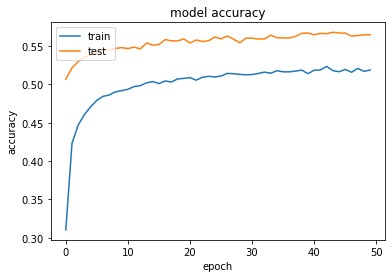

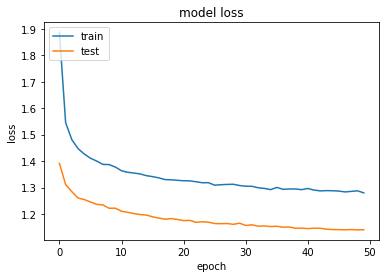

In [69]:
import matplotlib.pyplot as plt
def plot(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
plot(history)


In [45]:
# XG Boost

In [46]:
from sklearn.preprocessing import LabelEncoder 

lc = LabelEncoder() 
lc = lc.fit(y_train) 
lc_y = lc.transform(y_train)

lct = LabelEncoder() 
lct = lc.fit(y_test) 
lct_y = lc.transform(y_test)

In [53]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_validate,GridSearchCV

model = XGBClassifier(objective='multi:softmax')

model.fit(X_train, lc_y)

C:\Users\Acer\.conda\envs\ml\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\Acer\.conda\envs\ml\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:16:25] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [54]:
y_pred = model.predict(X_test)

predictions2 = [round(value) for value in y_pred]

In [55]:
from sklearn.metrics import accuracy_score
accuracy_xgboost = accuracy_score(lct_y, predictions2)
print("Accuracy: %.2f%%" % (accuracy_xgboost * 100.0))


print(classification_report(y_test, predictions2))


Accuracy: 56.88%
              precision    recall  f1-score   support

           0       0.42      0.37      0.40      1205
           1       0.82      0.77      0.79      1275
           2       0.61      0.56      0.59      1241
           3       0.83      0.83      0.83      1253
           4       0.55      0.58      0.57      1232
           5       0.69      0.62      0.66      1311
           6       0.37      0.39      0.38      1249
           7       0.56      0.53      0.54      1258
           8       0.35      0.35      0.35      1239
           9       0.51      0.66      0.58      1238
          10       1.00      1.00      1.00         1

    accuracy                           0.57     12502
   macro avg       0.61      0.61      0.61     12502
weighted avg       0.57      0.57      0.57     12502



In [56]:
# SVM

In [57]:
from sklearn import svm
from sklearn import metrics

clf = svm.SVC(kernel='poly')
clf.fit(X_train, y_train.ravel())
y_pred = clf.predict(X_test)
predictions3 = [round(value) for value in y_pred]

print("Accuracy:", metrics.accuracy_score(y_test.ravel(), y_pred))
print(classification_report(y_test, predictions3))

Accuracy: 0.5523916173412254
              precision    recall  f1-score   support

           0       0.36      0.42      0.39      1205
           1       0.75      0.69      0.72      1275
           2       0.55      0.55      0.55      1241
           3       0.85      0.81      0.83      1253
           4       0.41      0.59      0.48      1232
           5       0.70      0.55      0.62      1311
           6       0.47      0.60      0.53      1249
           7       0.56      0.42      0.48      1258
           8       0.50      0.28      0.35      1239
           9       0.51      0.60      0.55      1238
          10       1.00      1.00      1.00         1

    accuracy                           0.55     12502
   macro avg       0.61      0.59      0.59     12502
weighted avg       0.57      0.55      0.55     12502



In [58]:
from sklearn import svm
from sklearn import metrics

clf2 = svm.SVC(kernel='linear')
clf2.fit(X_train, y_train.ravel())
y_pred2 = clf2.predict(X_test)
predictions31 = [round(value) for value in y_pred]

print("Accuracy:", metrics.accuracy_score(y_test.ravel(), y_pred2))
print(classification_report(y_test, predictions31))

Accuracy: 0.5344744840825468
              precision    recall  f1-score   support

           0       0.36      0.42      0.39      1205
           1       0.75      0.69      0.72      1275
           2       0.55      0.55      0.55      1241
           3       0.85      0.81      0.83      1253
           4       0.41      0.59      0.48      1232
           5       0.70      0.55      0.62      1311
           6       0.47      0.60      0.53      1249
           7       0.56      0.42      0.48      1258
           8       0.50      0.28      0.35      1239
           9       0.51      0.60      0.55      1238
          10       1.00      1.00      1.00         1

    accuracy                           0.55     12502
   macro avg       0.61      0.59      0.59     12502
weighted avg       0.57      0.55      0.55     12502



In [59]:
from sklearn import svm
from sklearn import metrics

clf3 = svm.SVC(kernel='rbf')
clf3.fit(X_train, y_train.ravel())
y_pred3 = clf3.predict(X_test)
predictions32 = [round(value) for value in y_pred]

print("Accuracy:", metrics.accuracy_score(y_test.ravel(), y_pred3))
print(classification_report(y_test, predictions32))

Accuracy: 0.5773476243800992
              precision    recall  f1-score   support

           0       0.36      0.42      0.39      1205
           1       0.75      0.69      0.72      1275
           2       0.55      0.55      0.55      1241
           3       0.85      0.81      0.83      1253
           4       0.41      0.59      0.48      1232
           5       0.70      0.55      0.62      1311
           6       0.47      0.60      0.53      1249
           7       0.56      0.42      0.48      1258
           8       0.50      0.28      0.35      1239
           9       0.51      0.60      0.55      1238
          10       1.00      1.00      1.00         1

    accuracy                           0.55     12502
   macro avg       0.61      0.59      0.59     12502
weighted avg       0.57      0.55      0.55     12502



In [60]:
# KNN

In [61]:
lc = LabelEncoder() 
lc = lc.fit(y_train) 
lc_y = lc.transform(y_train)

lct = LabelEncoder() 
lct = lc.fit(y_test) 
lct_y = lc.transform(y_test)

from sklearn.neighbors import KNeighborsClassifier

knn_clf=KNeighborsClassifier()
knn_clf.fit(X_train,np.ravel(lc_y))
ypred=knn_clf.predict(X_test) 
predictions4 = [round(value) for value in ypred]
result2 = accuracy_score(np.ravel(lct_y),ypred)
print("Accuracy:",result2)
print(classification_report(y_test, predictions4))

Accuracy: 0.4873620220764678
              precision    recall  f1-score   support

           0       0.28      0.38      0.32      1205
           1       0.68      0.70      0.69      1275
           2       0.50      0.49      0.50      1241
           3       0.79      0.82      0.81      1253
           4       0.39      0.49      0.44      1232
           5       0.65      0.48      0.55      1311
           6       0.37      0.42      0.39      1249
           7       0.51      0.40      0.45      1258
           8       0.33      0.29      0.31      1239
           9       0.47      0.40      0.43      1238
          10       1.00      1.00      1.00         1

    accuracy                           0.49     12502
   macro avg       0.54      0.53      0.53     12502
weighted avg       0.50      0.49      0.49     12502



In [62]:
# Random Forest

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

rfc = RandomForestClassifier(n_estimators=200, random_state = 42)
rfc.fit(X_train, y_train);
predictions = rfc.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, predictions))


Accuracy: 0.5523916173412254
              precision    recall  f1-score   support

           0       0.41      0.38      0.39      1205
           1       0.80      0.76      0.78      1275
           2       0.61      0.57      0.59      1241
           3       0.84      0.84      0.84      1253
           4       0.54      0.56      0.55      1232
           5       0.69      0.61      0.65      1311
           6       0.35      0.39      0.37      1249
           7       0.55      0.53      0.54      1258
           8       0.31      0.30      0.30      1239
           9       0.48      0.61      0.54      1238
          10       1.00      1.00      1.00         1

    accuracy                           0.56     12502
   macro avg       0.60      0.59      0.60     12502
weighted avg       0.56      0.56      0.56     12502



In [64]:
# Decision tree

In [65]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

dct = DecisionTreeClassifier()
dct.fit(X_train, y_train);
y_pred=dct.predict(X_test) 
predictions5 = dct.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, predictions5))

Accuracy: 0.43617021276595747
              precision    recall  f1-score   support

           0       0.27      0.30      0.29      1205
           1       0.66      0.65      0.65      1275
           2       0.43      0.43      0.43      1241
           3       0.73      0.73      0.73      1253
           4       0.41      0.41      0.41      1232
           5       0.50      0.46      0.48      1311
           6       0.31      0.34      0.32      1249
           7       0.38      0.38      0.38      1258
           8       0.27      0.25      0.26      1239
           9       0.42      0.39      0.41      1238
          10       1.00      1.00      1.00         1

    accuracy                           0.44     12502
   macro avg       0.49      0.49      0.49     12502
weighted avg       0.44      0.44      0.44     12502



Wnioski:

Usunięcie dodatkowo dwóch kolumn nie zmieniło wiele - niektóre modele nauczyły się minimalnie lepiej, a niektóre nieco gorzej
Sieć neuronowa spisała się nieco gorzej
